<a href="https://www.kaggle.com/code/dllim1/data-science-salaries-2022?scriptVersionId=102170788" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Data Science Salaries

Hey Reader! Welcome and enjoy your stay!

### About the Datasets
The original STEM salary data is scraped off of `levels.fyi` with acknowledgement to the original author/scraper: https://www.kaggle.com/datasets/jackogozaly/data-science-and-stem-salaries

The cost of living data is from: https://www.kaggle.com/datasets/kkhandekar/cost-of-living-index-by-city-2022

### Objective
To find the best location to work as a Data Scientist, outside of FAANG and Microsoft

With this information, one can guide their career choices by selecting the right companies and locations.

### Table of Contents:

- Section 1: Data Science Salaries
- Section 2: Cost of Living Index
- Section 3: Combining Data Science Salaries with Cost of Living
- Section 4: Visualising the Data
- Section 5: Bonus Objectives
- Section 6: Conclusion



In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import ttest_ind

# Section 1: Data Science Salaries

First, we read the salary data into a Data Frame and perform a basic sense check the available data.

We will then filter out the salaries for data professionals only, since this is a STEM dataset.

In [2]:
# Read STEM Salaries
sdf = pd.read_csv('/kaggle/input/data-science-and-stem-salaries/Levels_Fyi_Salary_Data.csv') # sdf: Salary Data Frame
sdf.index.name = 'entry_id'
sdf['company'] = sdf['company'].str.title()
print(sdf.shape)

(62642, 29)


### Checking summary statistics

In [3]:
sdf.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
count,6.264200e+04,62642.000000,62642.000000,6.264200e+04,6.264200e+04,62642.000000,62642.000000,62640.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000
mean,2.163004e+05,7.204135,2.702093,1.366873e+05,5.148608e+04,19334.746588,9856.201989,616.097222,41694.723732,0.245698,0.201223,0.028783,0.005108,0.005667,0.187925,0.128221,0.012835,0.011015,0.018039
std,1.380337e+05,5.840375,3.263656,6.136928e+04,8.187457e+04,26781.292040,6679.104563,289.843390,24488.865879,0.430504,0.400917,0.167196,0.071291,0.075067,0.390655,0.334338,0.112562,0.104373,0.133094
min,1.000000e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.350000e+05,3.000000,0.000000,1.080000e+05,0.000000e+00,1000.000000,7369.000000,506.000000,20069.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.880000e+05,6.000000,2.000000,1.400000e+05,2.500000e+04,14000.000000,7839.000000,807.000000,42019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.640000e+05,10.000000,4.000000,1.700000e+05,6.500000e+04,26000.000000,11521.000000,807.000000,63021.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.980000e+06,69.000000,69.000000,1.659870e+06,2.800000e+06,1000000.000000,47926.000000,881.000000,83875.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Checking actual data


In [4]:
with pd.option_context('display.max_columns', None):
    display(sdf.head(5))

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
entry_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,20000.0,10000.0,NaN,NaN,7392,807.0,1,0,0,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,Ebay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,7419,807.0,2,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,0.0,0.0,NaN,NaN,11527,819.0,3,0,0,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,180000.0,35000.0,NaN,NaN,7472,807.0,7,0,0,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,7322,807.0,9,0,0,0,0,0,0,0,0,0,0,NaN,NaN


### Location data

Location information can be improved by splitting them into their own columns, for City, State and Country

In [5]:
sdf.location.value_counts()

Seattle, WA                      8701
San Francisco, CA                6797
New York, NY                     4562
Redmond, WA                      2649
Mountain View, CA                2275
                                 ... 
San Fernando, LB, Philippines       1
Suwanee, GA                         1
Oxford, MS                          1
Wayne, PA                           1
Hilbert, WI                         1
Name: location, Length: 1050, dtype: int64

It looks like not all locations are US-specific.

In [6]:
# Create a city ID so that we can use as a lookup
sdf[['city','state','country']] = sdf.location.str.split(", ",expand=True,n=2)
sdf.country.fillna('United States',inplace=True)
sdf['city_id'] = sdf.agg(lambda df: f"{df['city']}_{df['country']}",axis = 1)

sdf.head(5)

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,city,state,country,city_id
entry_id,,,,,,,,,,,,,,,,,,,,,
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,NaN,NaN,Redwood City,CA,United States,Redwood City_United States
1,6/10/2017 17:11:29,Ebay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,NaN,NaN,San Francisco,CA,United States,San Francisco_United States
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,NaN,NaN,Seattle,WA,United States,Seattle_United States
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,NaN,NaN,Sunnyvale,CA,United States,Sunnyvale_United States
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,NaN,NaN,Mountain View,CA,United States,Mountain View_United States


### Data Professionals Only
Next, we'll filter for job titles with the word "data" in them. This could range from Data Scientists, Engineers to Analysts.

In [7]:
sds = sdf[sdf.title.str.contains('data',case=False)] # sds: Salary for Data Science

print(sds.shape)
sds.head()

(2578, 33)


,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,city,state,country,city_id
entry_id,,,,,,,,,,,,,,,,,,,,,
419,6/5/2018 14:06:30,Linkedin,Senior,Data Scientist,233000,"San Francisco, CA",4.0,0.0,Data Analysis,162000.0,...,0,0,0,0,NaN,NaN,San Francisco,CA,United States,San Francisco_United States
440,6/8/2018 9:49:25,Microsoft,64,Data Scientist,218000,"Seattle, WA",11.0,11.0,ML / AI,165000.0,...,0,0,0,0,NaN,NaN,Seattle,WA,United States,Seattle_United States
444,6/8/2018 17:55:09,Ebay,26,Data Scientist,180000,"San Jose, CA",10.0,5.0,NaN,0.0,...,0,0,0,0,NaN,NaN,San Jose,CA,United States,San Jose_United States
454,6/10/2018 19:39:35,Twitter,Staff,Data Scientist,500000,"San Francisco, CA",4.0,4.0,ML / AI,200000.0,...,0,0,0,0,NaN,NaN,San Francisco,CA,United States,San Francisco_United States
495,6/17/2018 11:39:38,Facebook,5,Data Scientist,370000,"Seattle, WA",8.0,3.0,NaN,190000.0,...,0,0,0,0,NaN,NaN,Seattle,WA,United States,Seattle_United States


In [8]:
sds.title.value_counts()

Data Scientist    2578
Name: title, dtype: int64

It appears only Data Scientists are available in the job titles. This is great!

### Basic EDA
Now that we've filtered for Data Scientists only, let's perform some basic analysis of the data set.

In [9]:
sds.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
count,2578.000000,2578.000000,2578.000000,2578.000000,2578.000000,2578.000000,2578.000000,2578.000000,2578.000000,2578.000000,2578.000000,2578.000000,2578.000000,2578.000000,2578.000000,2578.000000,2578.000000,2578.000000,2578.000000
mean,203656.710628,5.059348,2.057622,138054.693561,40867.339022,17617.145074,9986.732739,620.963150,43468.069822,0.309542,0.094259,0.147789,0.001552,0.000388,0.195888,0.122964,0.010861,0.005043,0.012413
std,109504.643967,4.103621,2.256803,64405.538993,62490.550717,22240.502215,6609.613358,275.901269,24508.271158,0.462395,0.292246,0.354960,0.039367,0.019695,0.396960,0.328459,0.103669,0.070846,0.110740
min,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1182.000000,0.000000,813.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,135000.000000,2.000000,1.000000,110000.000000,0.000000,1250.000000,7419.000000,505.000000,22799.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,185000.000000,4.000000,2.000000,140000.000000,20000.000000,14000.000000,8178.000000,807.000000,44403.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,250000.000000,7.000000,3.000000,165000.000000,51000.000000,25000.000000,11521.000000,807.000000,65561.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1000000.000000,34.000000,20.000000,700000.000000,700000.000000,350000.000000,47926.000000,862.000000,83867.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

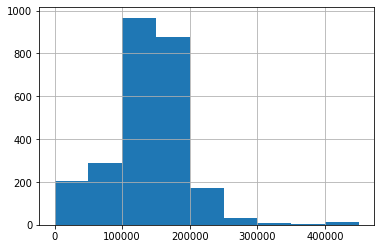

In [10]:
sds.basesalary.hist(bins=range(0,500000,50000))

<AxesSubplot:>

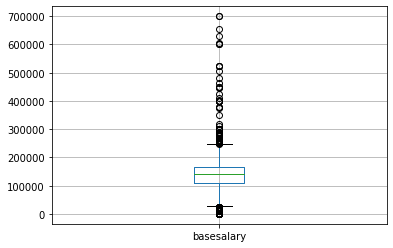

In [11]:
sds.boxplot(column = 'basesalary')

The base salaries are positively skewed, and a large number of outliers are in the higher ranges

### Excluding FAANG and Microsoft
For this experiment, we will remove FAANG and Microsoft data, as they are some industry heavyweights that may skew the overall data. We can explore this excluded data later.

Removing other outliers as a pre-processing step has been deliberately skipped as we want to see the entirety of the data set.

In [12]:
# Checking for Alphabet/Meta new names
display(sds.loc[sds.company.str.contains('alphabet',case=False),'company'])
display(sds.loc[sds.company.str.contains('meta',case=False),'company'])

Series([], Name: company, dtype: object)

Series([], Name: company, dtype: object)

In [13]:
faangless_sds = sds.copy()

faang_list = ['Facebook','Apple','Amazon','Netflix','Google','Microsoft']
faang_str = '|'.join(faang_list)

isfaang_s = sds.copy().company.str.contains(faang_str,case=False)

fds = faangless_sds = faangless_sds[isfaang_s == False]

print('Original data size  : ' , sds.shape)
print('FAANG-less data size: ' , fds.shape)
print(sds.shape[0] - fds.shape[0], 'rows removed')
print(round((fds.shape[0] / sds.shape[0])*100,1) , '% remaining')



Original data size  :  (2578, 33)
FAANG-less data size:  (1711, 33)
867 rows removed
66.4 % remaining


<AxesSubplot:>

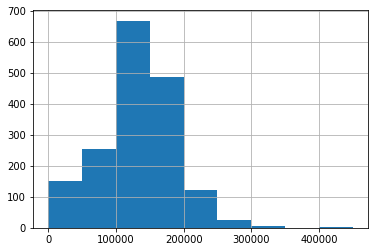

In [14]:
fds.basesalary.hist(bins=range(0,500000,50000))

<AxesSubplot:>

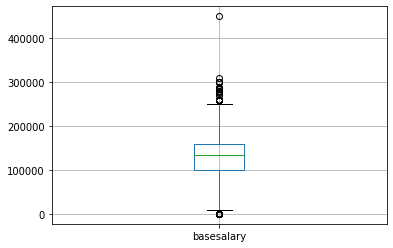

In [15]:
fds.boxplot(column = 'basesalary')

# Section 2: Cost of Living Index

Next, we read the cost of living index by city dataset into a dataframe and rename columns for easy consumption.

In [16]:
# Read the Cost of Living Index data
cdf = pd.read_csv('/kaggle/input/cost-of-living-index-by-city-2022/costofliving.csv') # cdf: City Data Frame

# Rename columns
cdf.rename(columns = {
    'Rent Index':'rent', 
    'Cost of Living Index':'coli',
    'Cost of Living Plus Rent Index':'colri',
    'Groceries Index':'groceries',
    'Restaurant Price Index':'restaurants',
    'Local Purchasing Power Index':'lppi'}
          , inplace = True)


In [17]:
# Check the data
cdf.head(15)

,Rank,City,coli,rent,colri,groceries,restaurants,lppi
0,NaN,"Hamilton, Bermuda",149.02,96.10,124.22,157.89,155.22,79.43
1,NaN,"Zurich, Switzerland",131.24,69.26,102.19,136.14,132.52,129.79
2,NaN,"Basel, Switzerland",130.93,49.38,92.70,137.07,130.95,111.53
3,NaN,"Zug, Switzerland",128.13,72.12,101.87,132.61,130.93,143.40
4,NaN,"Lugano, Switzerland",123.99,44.99,86.96,129.17,119.80,111.96
5,NaN,"Lausanne, Switzerland",122.03,59.55,92.74,122.56,127.01,127.01
6,NaN,"Beirut, Lebanon",120.47,27.76,77.01,141.33,116.95,15.40
7,NaN,"Bern, Switzerland",118.16,46.12,84.39,118.37,120.88,112.46
8,NaN,"Geneva, Switzerland",114.05,75.05,95.77,112.70,126.31,120.60
9,NaN,"Stavanger, Norway",104.61,35.38,72.16,102.46,107.51,85.90


Just like before, we should create separate columns for city, state and country, which also ends up being our city_id index for matching against the dataframes in Section 1

In [18]:
cdf[['city','state_','country_']] = cdf.City.str.split(", ",expand=True,n=2)

mask = cdf['state_'].str.len() > 2
cdf['state'] = np.where(mask, None, cdf['state_'])
cdf['country'] = np.where(mask, cdf['state_'], cdf['country_'])

cdf.drop(['Rank','City','state_','country_'], axis=1, inplace=True)
cdf['city_id'] = cdf.agg(lambda df: f"{df['city']}_{df['country']}",axis = 1)

cdf.set_index('city_id', inplace = True)

cdf.head(15)

,coli,rent,colri,groceries,restaurants,lppi,city,state,country
city_id,,,,,,,,,
Hamilton_Bermuda,149.02,96.10,124.22,157.89,155.22,79.43,Hamilton,None,Bermuda
Zurich_Switzerland,131.24,69.26,102.19,136.14,132.52,129.79,Zurich,None,Switzerland
Basel_Switzerland,130.93,49.38,92.70,137.07,130.95,111.53,Basel,None,Switzerland
Zug_Switzerland,128.13,72.12,101.87,132.61,130.93,143.40,Zug,None,Switzerland
Lugano_Switzerland,123.99,44.99,86.96,129.17,119.80,111.96,Lugano,None,Switzerland
Lausanne_Switzerland,122.03,59.55,92.74,122.56,127.01,127.01,Lausanne,None,Switzerland
Beirut_Lebanon,120.47,27.76,77.01,141.33,116.95,15.40,Beirut,None,Lebanon
Bern_Switzerland,118.16,46.12,84.39,118.37,120.88,112.46,Bern,None,Switzerland
Geneva_Switzerland,114.05,75.05,95.77,112.70,126.31,120.60,Geneva,None,Switzerland


Add a column "Easy 2 Live", which shows the relative local purchasing power of the city compared to the general cost of living there.

In [19]:
cdf['e2l'] = cdf['lppi'] / cdf['coli']

Good! Now we have everything we need to combine the two data sets.

# Section 3: Combining Data Science Salaries with Cost of Living

Since we need to know which cities are the best, we should use `city_id` as the index, and thus do a "`cdf` left join `fds` on `city_id` "

In [20]:
fdsc = fds.copy()
fdsc = fdsc.groupby('city_id').agg(
    avg_tc = pd.NamedAgg(column = 'totalyearlycompensation', aggfunc = 'mean'),
    avg_bs = pd.NamedAgg(column = 'basesalary', aggfunc = 'mean'),
    avg_sgv = pd.NamedAgg(column = 'stockgrantvalue', aggfunc = 'mean'),
    avg_bon = pd.NamedAgg(column = 'bonus', aggfunc = 'mean'),
    avg_yoe = pd.NamedAgg(column = 'yearsofexperience', aggfunc = 'mean'),
    avg_yac = pd.NamedAgg(column = 'yearsatcompany', aggfunc = 'mean'),
    r_a = pd.NamedAgg(column = 'Race_Asian', aggfunc = 'sum'),
    r_w = pd.NamedAgg(column = 'Race_White', aggfunc = 'sum'),
    r_2plus = pd.NamedAgg(column = 'Race_Two_Or_More', aggfunc = 'sum'),
    r_b = pd.NamedAgg(column = 'Race_Black', aggfunc = 'sum'),
    r_h = pd.NamedAgg(column = 'Race_Hispanic', aggfunc = 'sum'),
    count_ds = pd.NamedAgg(column = 'timestamp', aggfunc = 'count')
    )
fdsc.head()

,avg_tc,avg_bs,avg_sgv,avg_bon,avg_yoe,avg_yac,r_a,r_w,r_2plus,r_b,r_h,count_ds
city_id,,,,,,,,,,,,
Albuquerque_United States,115000.000000,103000.000000,10000.000000,2000.0,1.000000,1.000,0,0,0,0,0,1
Alexandria_United States,98000.000000,98000.000000,0.000000,0.0,4.000000,2.000,0,0,0,0,0,1
Alpharetta_United States,110000.000000,100000.000000,0.000000,10000.0,3.000000,3.000,1,0,0,0,0,1
Amsterdam_Netherlands,118500.000000,90750.000000,15450.000000,12250.0,4.400000,2.375,1,6,0,0,0,20
Ann Arbor_United States,158666.666667,144333.333333,2333.333333,12000.0,12.666667,7.000,0,0,0,0,0,3


In [21]:
cds = cdf.merge(fdsc,on='city_id',how='left')
cds.dropna(subset=['avg_tc','avg_bs'], inplace = True)
cds.head()

,coli,rent,colri,groceries,restaurants,lppi,city,state,country,e2l,...,avg_sgv,avg_bon,avg_yoe,avg_yac,r_a,r_w,r_2plus,r_b,r_h,count_ds
city_id,,,,,,,,,,,,,,,,,,,,,
Zurich_Switzerland,131.24,69.26,102.19,136.14,132.52,129.79,Zurich,None,Switzerland,0.988952,...,5000.000000,6750.000000,1.750000,0.750000,0.0,0.0,0.0,0.0,0.0,4.0
Basel_Switzerland,130.93,49.38,92.70,137.07,130.95,111.53,Basel,None,Switzerland,0.851829,...,0.000000,11000.000000,5.000000,3.000000,0.0,1.0,0.0,0.0,0.0,2.0
New York_United States,100.00,100.00,100.00,100.00,100.00,100.00,New York,NY,United States,1.000000,...,12452.261307,24241.206030,4.276382,1.798995,37.0,22.0,4.0,2.0,3.0,199.0
Berkeley_United States,94.36,88.22,91.48,106.23,78.85,85.78,Berkeley,CA,United States,0.909072,...,0.000000,40000.000000,6.000000,0.000000,0.0,1.0,0.0,0.0,0.0,1.0
San Francisco_United States,93.91,108.42,100.72,97.05,93.40,133.16,San Francisco,CA,United States,1.417953,...,82325.806452,15996.774194,4.880645,1.655000,53.0,30.0,2.0,0.0,2.0,310.0


In [22]:
print('Total count :',cds.count_ds.sum())
print('Original count :', fds.shape[0])
print('Number of entries without matchable cities :', fds.shape[0] - cds.count_ds.sum())
print(round((cds.count_ds.sum() / fds.shape[0])*100,2),'% of entries remain')

Total count : 1322.0
Original count : 1711
Number of entries without matchable cities : 389.0
77.26 % of entries remain


# Section 4: Visualising the Data

Check both Average Total Compensation and Average Base Salaries per City against the Cost of Living in the city. 

Also, a color scale is added for relative Ease of Living in the country by comparing Local Purchasing Power against Cost of Living

In [23]:
fig = px.scatter(cds, x='coli', y='avg_tc', text=cds.index ,size=cds['count_ds'], 
                 color='e2l',trendline="lowess",trendline_color_override="white",
                 title='Total Compensation vs Cost of Living Index', size_max=100,
                    labels={
                     "avg_tc":"Average Total Compensation",
                     "coli":"Cost of Living Index",
                     "e2l":"Ease of Living"}
                )

fig.update_traces(marker_sizemin=2, textposition='top center')
fig.update_layout(
    autosize=False,
    width=1000,
    height=800,)

fig.show()

In [24]:
fig = px.scatter(cds, x='coli', y='avg_bs', text=cds.index, size=cds['count_ds'], 
                 color='e2l',trendline="lowess",trendline_color_override="white",
                 title='Base Salary vs Cost of Living Index', size_max=100,
                    labels={
                     "avg_bs":"Base Salary",
                     "coli":"Cost of Living Index",
                     "e2l":"Ease of Living"}
                )

fig.update_traces(marker_sizemin=2, textposition='top center')
fig.update_layout(
    autosize=False,
    width=1000,
    height=800,)

fig.show()

Observations:
- Both Basel and Zurich in Switzerland are expensive to live in, but also do not provide sufficiently high incomes for data scientists.
- Both New York and San Francisco are popular and pay well, but San Francisco has a higher salary and lower cost of living of the two, and is thus preferred. This can be inferred as "Bay Area salaries".
- Oakland and San Antonio may be outliers, and worth investigating the data set further.
- Los Angeles, San Jose and Portland in the US are good alternatives aside from SF and NYC
- Bangalore is one of the best places to live in for its income range, due to high LPPI/COL ratio.

# Section 5: Bonus Questions

#### Test impact of Race on Salaries

H_0 : Base salaries of Whites are the same as that of Asians  
H_1 : Base salaries of Whites are more than that of Asians

Use a 95% CI for a one-tailed test.

In [25]:
a = fds.loc[fds.Race_Asian == 1,'basesalary']
w = fds.loc[fds.Race_White == 1,'basesalary']

print('Average salary difference:', w.mean() - a.mean())

print(ttest_ind(a,w,equal_var=True))

Average salary difference: 5104.170641431672
Ttest_indResult(statistic=-1.1656911491570852, pvalue=0.24422180841308064)


Since p-value is 0.24 , which is more than 0.05, H_0 is accepted

#### Explore Education levels

First, let's look at the distribution of highest education levels of the entries in our filtered data set.

<AxesSubplot:>

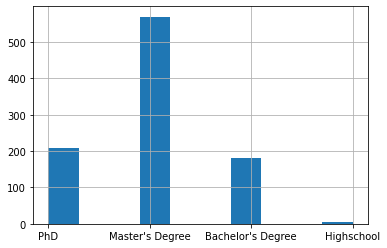

In [26]:
fds.Education.hist()

<AxesSubplot:ylabel='Education'>

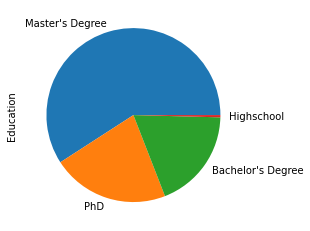

In [27]:
fds.Education.value_counts().plot(kind='pie')


In [28]:
print(str(round((fds[fds.Education == "Master's Degree"].shape[0] / fds.loc[fds.Education.notnull()].shape[0]) * 100,2)) + '%')

59.13%


For all available Education levels given in the data set, around 59% have attained Masters Degrees as the highest form of Education

In [29]:
fds.groupby(['Education']).mean().basesalary

Education
Bachelor's Degree    100433.333333
Highschool           100500.000000
Master's Degree      129149.122807
PhD                  159780.952381
Name: basesalary, dtype: float64

Bachelor's Degree holders make just about as much as High School graduates! Having Masters adds around 30k to average salaries, and so does PhD. Time to get studying!

#### Years of Experience vs Salary per City

In [30]:
fig = px.scatter(cds, x='avg_yoe', y='avg_bs', text=cds.index, size=cds['count_ds'], 
                 color='e2l',trendline="lowess",trendline_color_override="white",
                 title='Base Salary vs Years of Experience', size_max=100,
                    labels={
                     "avg_bs":"Base Salary",
                     "avg_yoe":"Years of Experience",
                     "e2l":"Ease of Living"}
                )

fig.update_traces(marker_sizemin=2, textposition='top center')
fig.update_layout(
    autosize=False,
    width=1000,
    height=800,)

fig.show()

#### FAANG salaries by Years of Experience

In [31]:
faang_sds = sds.copy()

ffds = faang_sds = faang_sds[isfaang_s == True]
for co in faang_list:
    ffds.loc[ffds['company'].str.contains(co), 'company'] = co

print('Original data size  : ' , sds.shape)
print('FAANG data size: ' , ffds.shape)
print(sds.shape[0] - ffds.shape[0], 'rows removed')
print(round((ffds.shape[0] / sds.shape[0])*100,1) , '% remaining')

Original data size  :  (2578, 33)
FAANG data size:  (867, 33)
1711 rows removed
33.6 % remaining


In [32]:
ffds_bycompany_yoe = ffds.groupby(['company','yearsofexperience','city_id']).agg(
    avg_tc = pd.NamedAgg(column = 'totalyearlycompensation', aggfunc = 'mean'),
    avg_bs = pd.NamedAgg(column = 'basesalary', aggfunc = 'mean'),
    avg_sgv = pd.NamedAgg(column = 'stockgrantvalue', aggfunc = 'mean'),
    avg_bon = pd.NamedAgg(column = 'bonus', aggfunc = 'mean'),
    avg_yac = pd.NamedAgg(column = 'yearsatcompany', aggfunc = 'mean'),
    count_ds = pd.NamedAgg(column = 'timestamp', aggfunc = 'count')
).reset_index()


In [33]:
faang_colours = dict(zip(faang_list,['rgb(66,103,178)','rgb(0,0,0)','rgb(255,153,0)','rgb(229,9,20)','rgb(60,186,84)','rgb(0,164,239)']))

traces = []
for co in faang_list:
    co_df = ffds_bycompany_yoe[ffds_bycompany_yoe.company == co].groupby('yearsofexperience').agg({'avg_tc':'mean', 'avg_bs':'mean', 'count_ds':'sum'}).reset_index()
    traces.append(
        go.Scatter(
            x=co_df['yearsofexperience'],
            y=co_df['avg_bs'],
            name=co,
            marker=dict(
                color=faang_colours[co],
                size = co_df['count_ds']
                       )
        )
    )

fig = make_subplots()
for t in traces:
    fig.add_trace(t)
    
fig['layout'].update(height = 600, width = 800, title = 'Average Base Salary by Company and Years of Experience')
fig.update_xaxes(title_text="Years of Experience")
fig.update_yaxes(title_text="Average Base Salary")

fig.show()

Wow, Netflix!

Nuff said.

# Section 6: Conclusion

Thanks for making it this far, hope you enjoyed the read.

From the analysis above, here's some key finds:
- Location is the number one contributing factor to salaries.
- United States hosts the cities with the highest Data Science salaries in general, even when not considering FAANG companies.
- Switzerland is more expensive to live in than in United States, but does not have salaries that match the cost of living.
- Netflix seems to have a very high salary compared to the other FAANG companies.
- A large majority of data professionals have Masters degrees or higher. The salaries also correlate well with the level of education.

This analysis is not perfect, and a v2 in the future may be possible, from the lessons learnt here. There are so many ways to cut the data and so many metrics that may be important to different readers. I have chosen some topics that are interesting to me here, but am open to suggestions. Also, given the dataset, there may be some outliers or unclean data that I have not attempted to wrangle in this notebook.

Plase feel free to leave me comments on how I can improve this, and time-permitting, I'd love to keep improving this notebook over time. 

-----

### About the Author

Hi, I'm DL, a passionate data scientist, looking to understand the world through data.

I'm available for Data Science work and more, please feel free to leave me an email here (no spam please!): dl.biz2@outlook.com

Let's chat more if we're a good fit. Don't overfit! ;)

Always learning.